### 1. Import the necessary libs

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from prophet import Prophet
import sys
import os

### 2. Load the dataframes one by one

In [3]:
path_of_files = r"C:\Users\yusuf\OneDrive\Desktop\Forex Project\processed"

def load_dataFrames():
    csv_files = [file for file in os.listdir(path_of_files) if file.endswith(".csv") and os.path.isfile(os.path.join(path_of_files, file))]
    ## from the previous data preperation part we have seen that pyspark is actually not a good idea to use when we have pandas so I will directly take them as pandas DataFrames.
    pd_dfs = {}
    for file in csv_files:
        file_path = os.path.join(path_of_files, file)
        file_name = os.path.splitext(file)[0]
        pd_dfs[file_name] = pd.read_csv(file_path)
    return pd_dfs
pd_dfs = load_dataFrames()

### 3. Run the base prophet model to try the model

Fitting Prophet model for EURUSD_M1_processed...


15:49:50 - cmdstanpy - INFO - Chain [1] start processing
15:53:28 - cmdstanpy - INFO - Chain [1] done processing


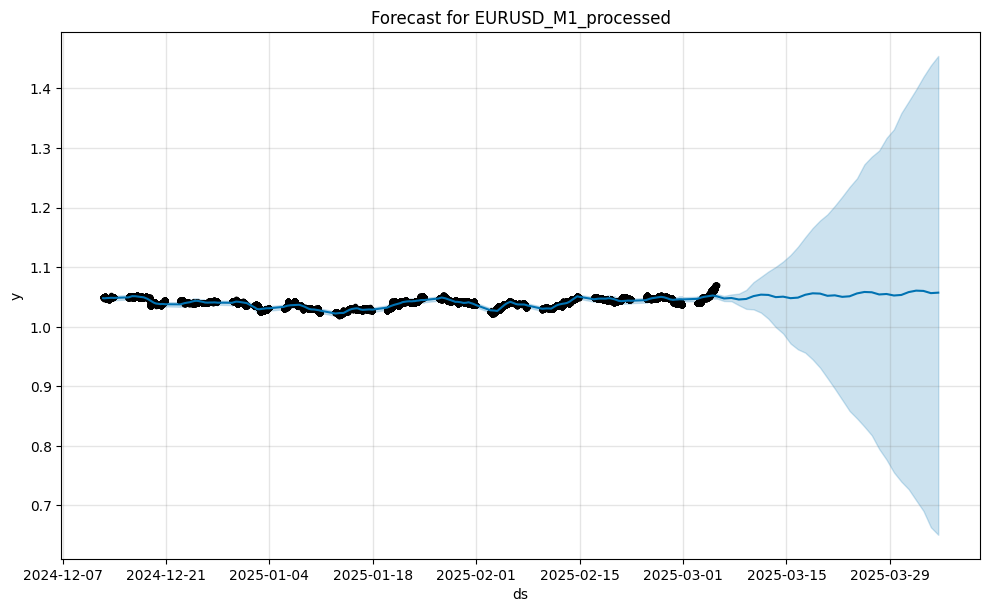

  0%|          | 0/6 [00:00<?, ?it/s]

15:54:02 - cmdstanpy - INFO - Chain [1] start processing
15:55:47 - cmdstanpy - INFO - Chain [1] done processing
15:56:23 - cmdstanpy - INFO - Chain [1] start processing
16:00:55 - cmdstanpy - INFO - Chain [1] done processing
16:01:43 - cmdstanpy - INFO - Chain [1] start processing
16:08:14 - cmdstanpy - INFO - Chain [1] done processing
16:08:40 - cmdstanpy - INFO - Chain [1] start processing
16:12:43 - cmdstanpy - INFO - Chain [1] done processing
16:13:30 - cmdstanpy - INFO - Chain [1] start processing
16:21:57 - cmdstanpy - INFO - Chain [1] done processing
16:22:18 - cmdstanpy - INFO - Chain [1] start processing
16:29:23 - cmdstanpy - INFO - Chain [1] done processing


               horizon       mse      rmse       mae      mape     mdape  \
0      1 days 01:55:00  0.000033  0.005783  0.004911  0.004726  0.004540   
1      1 days 01:56:00  0.000033  0.005786  0.004913  0.004729  0.004547   
2      1 days 01:57:00  0.000034  0.005788  0.004916  0.004732  0.004549   
3      1 days 01:58:00  0.000034  0.005791  0.004919  0.004734  0.004550   
4      1 days 01:59:00  0.000034  0.005795  0.004923  0.004738  0.004553   
...                ...       ...       ...       ...       ...       ...   
12840  9 days 23:56:00  0.000685  0.026164  0.022392  0.021618  0.020108   
12841  9 days 23:57:00  0.000685  0.026169  0.022396  0.021622  0.020118   
12842  9 days 23:58:00  0.000685  0.026173  0.022400  0.021626  0.020143   
12843  9 days 23:59:00  0.000685  0.026178  0.022405  0.021630  0.020157   
12844 10 days 00:00:00  0.000685  0.026181  0.022407  0.021632  0.020162   

          smape  coverage  
0      0.004739  0.359566  
1      0.004741  0.359222  
2  

16:35:40 - cmdstanpy - INFO - Chain [1] start processing
16:46:14 - cmdstanpy - INFO - Chain [1] done processing


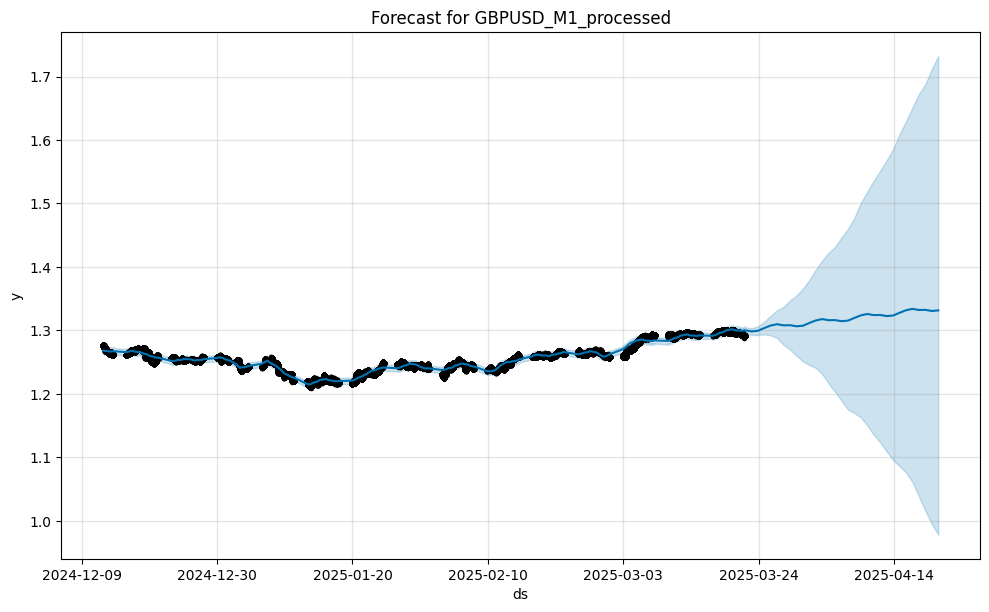

  0%|          | 0/7 [00:00<?, ?it/s]

16:47:03 - cmdstanpy - INFO - Chain [1] start processing
16:48:15 - cmdstanpy - INFO - Chain [1] done processing
16:48:19 - cmdstanpy - INFO - Chain [1] start processing
16:49:04 - cmdstanpy - INFO - Chain [1] done processing
16:49:09 - cmdstanpy - INFO - Chain [1] start processing
16:50:01 - cmdstanpy - INFO - Chain [1] done processing
16:50:05 - cmdstanpy - INFO - Chain [1] start processing
16:51:13 - cmdstanpy - INFO - Chain [1] done processing
16:51:19 - cmdstanpy - INFO - Chain [1] start processing
16:52:51 - cmdstanpy - INFO - Chain [1] done processing
16:52:58 - cmdstanpy - INFO - Chain [1] start processing
16:54:27 - cmdstanpy - INFO - Chain [1] done processing
16:54:34 - cmdstanpy - INFO - Chain [1] start processing
16:56:26 - cmdstanpy - INFO - Chain [1] done processing


               horizon       mse      rmse       mae      mape     mdape  \
0      1 days 00:03:00  0.000026  0.005079  0.004289  0.003430  0.003022   
1      1 days 00:04:00  0.000026  0.005081  0.004291  0.003431  0.003023   
2      1 days 00:05:00  0.000026  0.005083  0.004292  0.003433  0.003023   
3      1 days 00:06:00  0.000026  0.005085  0.004293  0.003434  0.003023   
4      1 days 00:07:00  0.000026  0.005086  0.004294  0.003434  0.003023   
...                ...       ...       ...       ...       ...       ...   
12952  9 days 23:56:00  0.003503  0.059187  0.035533  0.028647  0.014693   
12953  9 days 23:57:00  0.003506  0.059213  0.035550  0.028661  0.014697   
12954  9 days 23:58:00  0.003509  0.059239  0.035570  0.028677  0.014699   
12955  9 days 23:59:00  0.003512  0.059265  0.035588  0.028691  0.014699   
12956 10 days 00:00:00  0.003515  0.059291  0.035605  0.028705  0.014701   

          smape  coverage  
0      0.003424  0.571969  
1      0.003425  0.572115  
2  

16:57:37 - cmdstanpy - INFO - Chain [1] start processing
16:59:03 - cmdstanpy - INFO - Chain [1] done processing


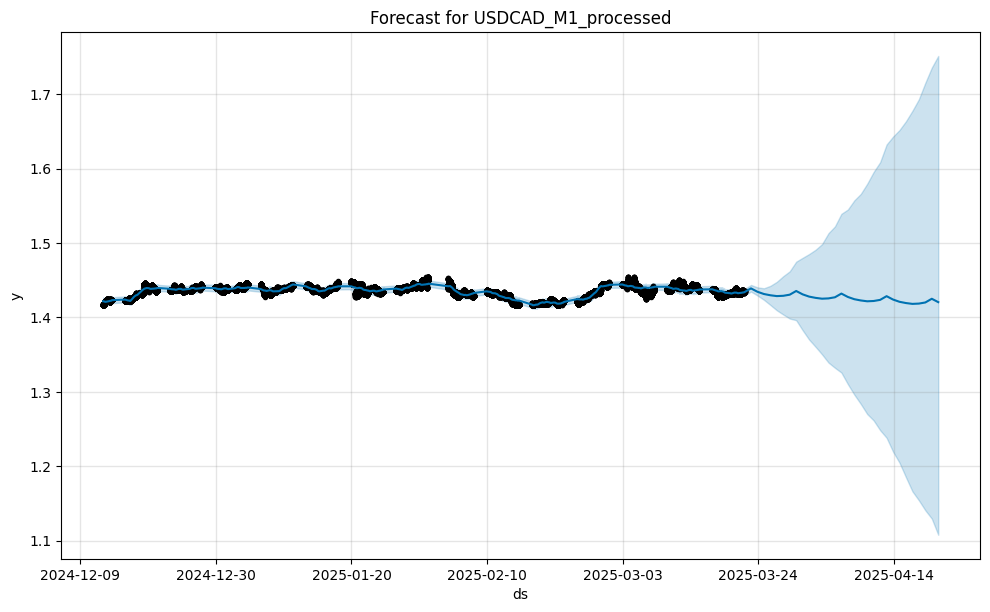

  0%|          | 0/7 [00:00<?, ?it/s]

16:59:23 - cmdstanpy - INFO - Chain [1] start processing
17:00:02 - cmdstanpy - INFO - Chain [1] done processing
17:00:06 - cmdstanpy - INFO - Chain [1] start processing
17:00:42 - cmdstanpy - INFO - Chain [1] done processing
17:00:47 - cmdstanpy - INFO - Chain [1] start processing
17:01:45 - cmdstanpy - INFO - Chain [1] done processing
17:01:50 - cmdstanpy - INFO - Chain [1] start processing
17:02:53 - cmdstanpy - INFO - Chain [1] done processing
17:03:00 - cmdstanpy - INFO - Chain [1] start processing
17:04:29 - cmdstanpy - INFO - Chain [1] done processing
17:04:35 - cmdstanpy - INFO - Chain [1] start processing
17:06:01 - cmdstanpy - INFO - Chain [1] done processing
17:06:08 - cmdstanpy - INFO - Chain [1] start processing
17:07:45 - cmdstanpy - INFO - Chain [1] done processing


               horizon       mse      rmse       mae      mape     mdape  \
0      0 days 23:39:00  0.000040  0.006356  0.005726  0.003988  0.004569   
1      0 days 23:40:00  0.000040  0.006356  0.005727  0.003989  0.004566   
2      0 days 23:41:00  0.000040  0.006357  0.005729  0.003989  0.004569   
3      0 days 23:42:00  0.000040  0.006358  0.005729  0.003990  0.004569   
4      0 days 23:43:00  0.000040  0.006358  0.005730  0.003990  0.004569   
...                ...       ...       ...       ...       ...       ...   
12970  9 days 23:56:00  0.000153  0.012371  0.009688  0.006753  0.005097   
12971  9 days 23:57:00  0.000153  0.012364  0.009686  0.006752  0.005098   
12972  9 days 23:58:00  0.000153  0.012357  0.009684  0.006751  0.005101   
12973  9 days 23:59:00  0.000153  0.012353  0.009683  0.006750  0.005101   
12974 10 days 00:00:00  0.000152  0.012343  0.009680  0.006748  0.005101   

          smape  coverage  
0      0.003995  0.241884  
1      0.003996  0.241838  
2  

17:08:56 - cmdstanpy - INFO - Chain [1] start processing
17:11:19 - cmdstanpy - INFO - Chain [1] done processing


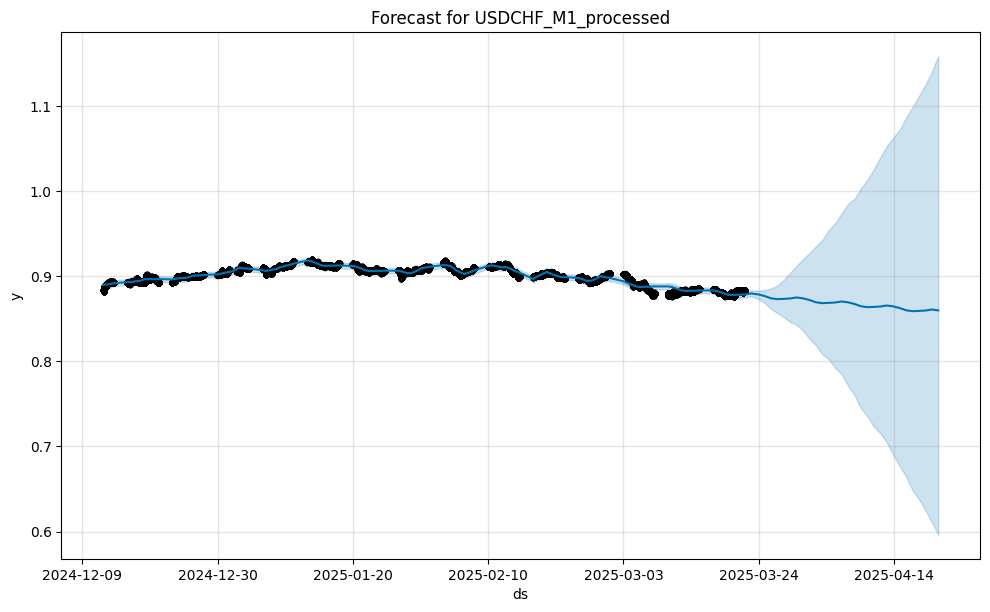

  0%|          | 0/7 [00:00<?, ?it/s]

17:11:38 - cmdstanpy - INFO - Chain [1] start processing
17:12:04 - cmdstanpy - INFO - Chain [1] done processing
17:12:08 - cmdstanpy - INFO - Chain [1] start processing
17:12:57 - cmdstanpy - INFO - Chain [1] done processing
17:13:02 - cmdstanpy - INFO - Chain [1] start processing
17:13:57 - cmdstanpy - INFO - Chain [1] done processing
17:14:02 - cmdstanpy - INFO - Chain [1] start processing
17:15:10 - cmdstanpy - INFO - Chain [1] done processing
17:15:16 - cmdstanpy - INFO - Chain [1] start processing
17:16:42 - cmdstanpy - INFO - Chain [1] done processing
17:16:49 - cmdstanpy - INFO - Chain [1] start processing
17:18:16 - cmdstanpy - INFO - Chain [1] done processing
17:18:24 - cmdstanpy - INFO - Chain [1] start processing
17:19:52 - cmdstanpy - INFO - Chain [1] done processing


               horizon       mse      rmse       mae      mape     mdape  \
0      0 days 23:37:00  0.000007  0.002732  0.002377  0.002636  0.002789   
1      0 days 23:38:00  0.000007  0.002732  0.002377  0.002636  0.002789   
2      0 days 23:39:00  0.000007  0.002731  0.002377  0.002636  0.002789   
3      0 days 23:40:00  0.000007  0.002731  0.002377  0.002636  0.002788   
4      0 days 23:41:00  0.000007  0.002731  0.002376  0.002635  0.002789   
...                ...       ...       ...       ...       ...       ...   
12968  9 days 23:56:00  0.000680  0.026078  0.017608  0.019505  0.012350   
12969  9 days 23:57:00  0.000681  0.026091  0.017616  0.019514  0.012348   
12970  9 days 23:58:00  0.000681  0.026103  0.017625  0.019524  0.012348   
12971  9 days 23:59:00  0.000682  0.026116  0.017633  0.019533  0.012346   
12972 10 days 00:00:00  0.000683  0.026129  0.017643  0.019543  0.012348   

          smape  coverage  
0      0.002639  0.679096  
1      0.002639  0.679304  
2  

In [16]:
# we will first try the very beginner prophet model with close as the y and date as the ds parameter.
from prophet.diagnostics import cross_validation, performance_metrics

for name, file in pd_dfs.items():
    if 'Time' in file.columns:
        df_prophet = pd.DataFrame({
            'ds': pd.to_datetime(file["Time"]),
            'y': file["Close"]
        })

        print(f"Fitting Prophet model for {name}...")
        model = Prophet()
        model.fit(df_prophet)

        future = model.make_future_dataframe(periods=30)
        forecast = model.predict(future)
        
        fig = model.plot(forecast)
        plt.title(f"Forecast for {name}")
        plt.show()

        df_cross = cross_validation(model=model, initial='20 days', period='10 days', horizon='10 days')
        df_performance = performance_metrics(df_cross)

        print(df_performance)

        print(f"MAPE: {df_performance['mape'].mean()}")
    else:
        print(f"Error: No date column found in {name} dataset")

### 3A. Detailed test of the model to see if it is overfitting or not. 

In [ ]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

def adaptive_prophet_analysis(name, file):
    """Run Prophet with CV parameters adapted to your data size"""
    
    if 'Time' not in file.columns:
        print(f"Error: No date column found in {name} dataset")
        return
    
    # Prepare data
    df_prophet = pd.DataFrame({
        'ds': pd.to_datetime(file["Time"]),
        'y': pd.to_numeric(file["Close"], errors='coerce')
    }).dropna().sort_values('ds').reset_index(drop=True)
    
    total_days = (df_prophet['ds'].max() - df_prophet['ds'].min()).days
    data_points = len(df_prophet)
    
    print(f"\n{'='*60}")
    print(f"PROPHET ANALYSIS FOR {name}")
    print(f"{'='*60}")
    print(f"Data points: {data_points}")
    print(f"Total days span: {total_days}")
    print(f"Date range: {df_prophet['ds'].min().date()} to {df_prophet['ds'].max().date()}")
    
    # Determine appropriate CV parameters based on data size
    if total_days < 60:
        cv_configs = [
            {'name': 'Only Possible Setup', 'initial': '15 days', 'period': '5 days', 'horizon': '5 days'}
        ]
        print(f"⚠️  Limited data - only basic CV possible")
    elif total_days < 120:
        cv_configs = [
            {'name': 'Short Dataset - Easy', 'initial': '20 days', 'period': '7 days', 'horizon': '7 days'},
            {'name': 'Short Dataset - Harder', 'initial': '30 days', 'period': '10 days', 'horizon': '15 days'}
        ]
    elif total_days < 200:
        cv_configs = [
            {'name': 'Your Current (Easy)', 'initial': '20 days', 'period': '10 days', 'horizon': '10 days'},
            {'name': 'Moderate Test', 'initial': '40 days', 'period': '15 days', 'horizon': '20 days'},
            {'name': 'Challenging Test', 'initial': '60 days', 'period': '20 days', 'horizon': '30 days'}
        ]
    else:
        cv_configs = [
            {'name': 'Easy Test', 'initial': '30 days', 'period': '15 days', 'horizon': '15 days'},
            {'name': 'Moderate Test', 'initial': '60 days', 'period': '20 days', 'horizon': '30 days'},
            {'name': 'Rigorous Test', 'initial': '90 days', 'period': '30 days', 'horizon': '45 days'}
        ]
    
    # Fit the model
    print(f"\nFitting Prophet model...")
    model = Prophet(
        daily_seasonality=False,
        weekly_seasonality=True if total_days > 30 else False,
        yearly_seasonality=True if total_days > 200 else False
    )
    model.fit(df_prophet)
    
    # Create forecast (using your 30-day limit)
    future = model.make_future_dataframe(periods=30)
    forecast = model.predict(future)
    
    # Plot the forecast
    fig = model.plot(forecast, figsize=(12, 6))
    plt.title(f"Prophet Forecast for {name}")
    plt.tight_layout()
    plt.show()
    
    # Run cross-validation tests
    print(f"\n--- CROSS-VALIDATION RESULTS ---")
    
    results = []
    
    for config in cv_configs:
        try:
            print(f"\n{config['name']}:")
            print(f"  Setup: initial={config['initial']}, period={config['period']}, horizon={config['horizon']}")
            
            df_cross = cross_validation(
                model=model,
                initial=config['initial'],
                period=config['period'], 
                horizon=config['horizon']
            )
            
            df_performance = performance_metrics(df_cross)
            
            avg_mape = df_performance['mape'].mean()
            avg_smape = df_performance['smape'].mean() 
            avg_coverage = df_performance['coverage'].mean()
            
            results.append({
                'config': config['name'],
                'mape': avg_mape,
                'smape': avg_smape,
                'coverage': avg_coverage
            })
            
            print(f"  MAPE: {avg_mape:.4f} ({avg_mape*100:.2f}%)")
            print(f"  SMAPE: {avg_smape:.4f}")
            print(f"  Coverage: {avg_coverage:.3f}")
            
            # Contextual interpretation
            if config['name'].endswith('Easy') or config['name'].endswith('(Easy)'):
                if avg_mape < 0.05:
                    print(f"  💭 Very low error on easy test - check harder tests")
                else:
                    print(f"  📊 Reasonable performance on easy test")
            else:
                if avg_mape < 0.10:
                    print(f"  ✅ Excellent performance on challenging test!")
                elif avg_mape < 0.20:
                    print(f"  👍 Good performance")
                elif avg_mape < 0.40:
                    print(f"  📈 Moderate performance")
                else:
                    print(f"  📉 Poor performance")
                
        except Exception as e:
            print(f"  ❌ Failed: {str(e)}")
            if "initial" in str(e).lower() or "period" in str(e).lower():
                print(f"     Not enough data - try smaller parameters")
    
    # Overfitting analysis
    if len(results) > 1:
        print(f"\n--- OVERFITTING CHECK ---")
        easy_mape = results[0]['mape']
        hard_mape = results[-1]['mape']
        
        if len(results) > 1:
            ratio = hard_mape / easy_mape if easy_mape > 0 else float('inf')
            print(f"Performance degradation ratio: {ratio:.2f}")
            
            if ratio > 3.0:
                print(f"🚨 HIGH overfitting risk - performance drops {ratio:.1f}x on harder test")
            elif ratio > 2.0:
                print(f"⚠️  MODERATE overfitting - performance drops {ratio:.1f}x")
            elif ratio > 1.5:
                print(f"⚡ SLIGHT overfitting - performance drops {ratio:.1f}x")
            else:
                print(f"✅ GOOD generalization - consistent performance")
    
    # Data size recommendations
    print(f"\n--- RECOMMENDATIONS FOR {name} ---")
    if total_days < 90:
        print(f"📅 Limited data ({total_days} days) - results should be interpreted cautiously")
        print(f"💡 Consider collecting more historical data for robust evaluation")
    elif total_days < 200:
        print(f"📅 Moderate data ({total_days} days) - reasonable for basic forecasting")
        print(f"💡 More data would allow for more rigorous testing")
    else:
        print(f"📅 Good data coverage ({total_days} days) - results are more reliable")
    
    return model, forecast, results

# Run the adaptive analysis
for name, file in pd_dfs.items():
    try:
        model, forecast, results = adaptive_prophet_analysis(name, file)
    except Exception as e:
        print(f"Error processing {name}: {e}")

print(f"\n{'='*60}")
print("SUMMARY: The key insight is whether performance degrades significantly")
print("as we make the cross-validation more challenging. If your 2% error")
print("jumps to 15%+ on harder tests, that indicates overfitting.")
print(f"{'='*60}")

### 4. Expand the model with regressors

Index(['Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'MA5', 'MA20',
       'MA20_std', 'BB_upper', 'BB_lower', 'Price_Change', 'Price_Change_Pct',
       'Daily_Range', 'Daily_Range_Pct', 'True_Range', 'ATR14', 'RSI14',
       'EMA12', 'EMA26', 'MACD', 'MACD_Signal', 'MACD_Hist'],
      dtype='object')


09:10:52 - cmdstanpy - INFO - Chain [1] start processing
09:12:08 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\yusuf\AppData\Local\Temp\ipykernel_5100\3138114131.py:19: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  future["ATR14"] = future["ATR14"].fillna(method="ffill").fillna(last_atr)


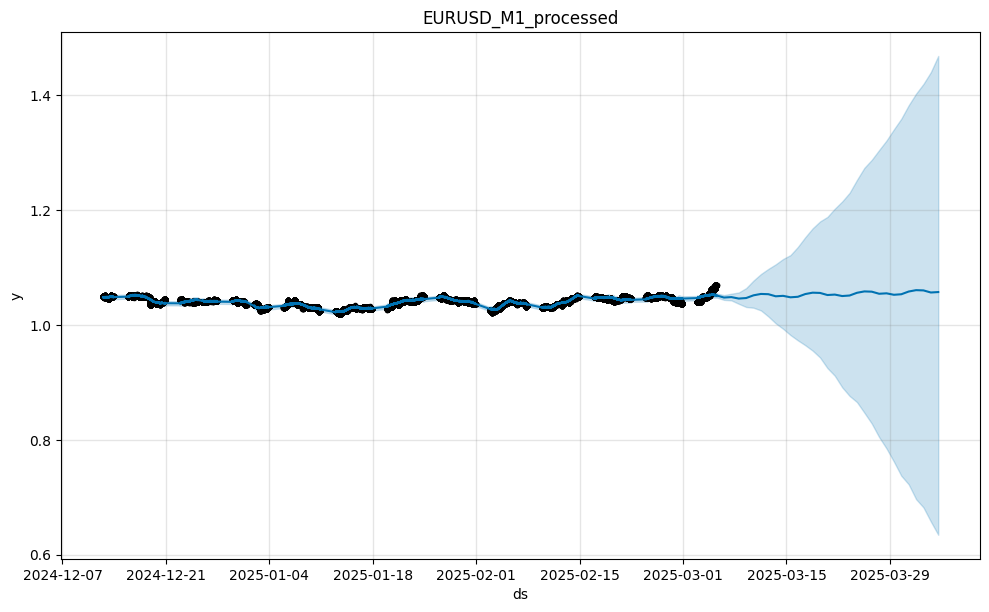

Index(['Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'MA5', 'MA20',
       'MA20_std', 'BB_upper', 'BB_lower', 'Price_Change', 'Price_Change_Pct',
       'Daily_Range', 'Daily_Range_Pct', 'True_Range', 'ATR14', 'RSI14',
       'EMA12', 'EMA26', 'MACD', 'MACD_Signal', 'MACD_Hist'],
      dtype='object')


09:12:27 - cmdstanpy - INFO - Chain [1] start processing
09:14:30 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\yusuf\AppData\Local\Temp\ipykernel_5100\3138114131.py:19: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  future["ATR14"] = future["ATR14"].fillna(method="ffill").fillna(last_atr)


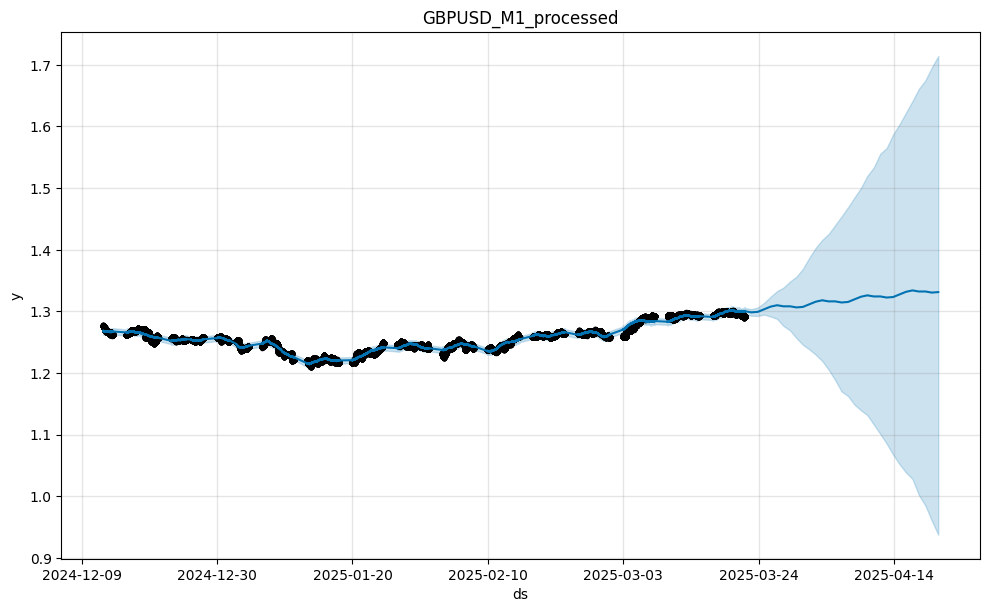

Index(['Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'MA5', 'MA20',
       'MA20_std', 'BB_upper', 'BB_lower', 'Price_Change', 'Price_Change_Pct',
       'Daily_Range', 'Daily_Range_Pct', 'True_Range', 'ATR14', 'RSI14',
       'EMA12', 'EMA26', 'MACD', 'MACD_Signal', 'MACD_Hist'],
      dtype='object')


09:14:50 - cmdstanpy - INFO - Chain [1] start processing
09:16:50 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\yusuf\AppData\Local\Temp\ipykernel_5100\3138114131.py:19: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  future["ATR14"] = future["ATR14"].fillna(method="ffill").fillna(last_atr)


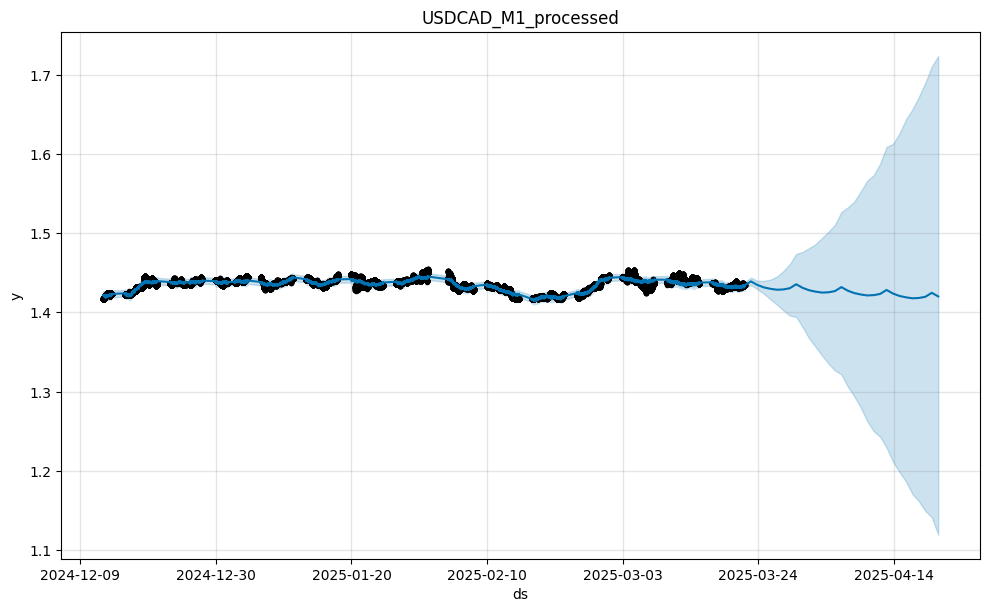

Index(['Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'MA5', 'MA20',
       'MA20_std', 'BB_upper', 'BB_lower', 'Price_Change', 'Price_Change_Pct',
       'Daily_Range', 'Daily_Range_Pct', 'True_Range', 'ATR14', 'RSI14',
       'EMA12', 'EMA26', 'MACD', 'MACD_Signal', 'MACD_Hist'],
      dtype='object')


09:17:09 - cmdstanpy - INFO - Chain [1] start processing
09:19:00 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\yusuf\AppData\Local\Temp\ipykernel_5100\3138114131.py:19: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  future["ATR14"] = future["ATR14"].fillna(method="ffill").fillna(last_atr)


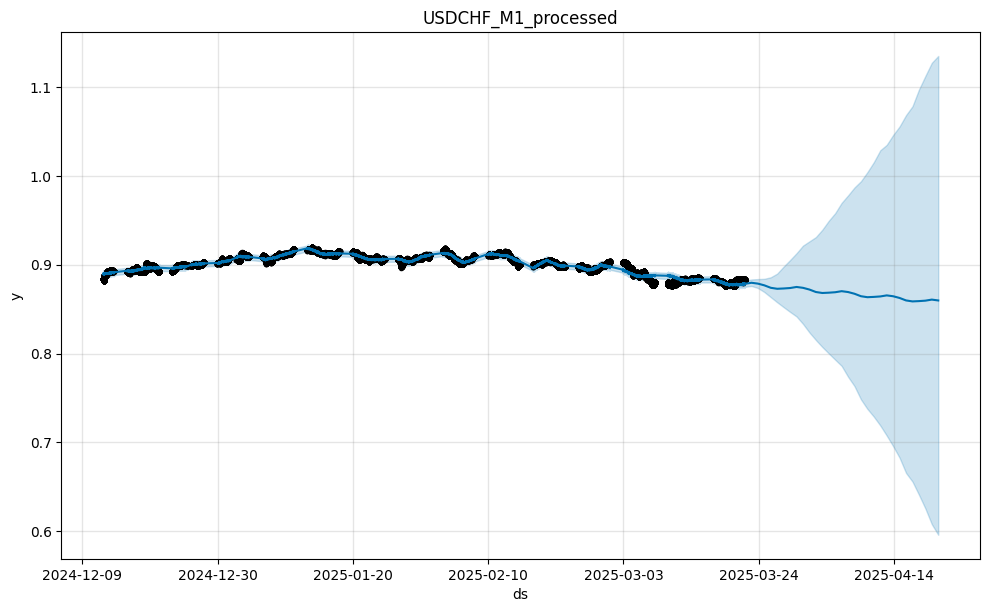

In [ ]:
### lets see if adding more regressors can improve the accuracy of the model
### only adding ATR14 attribute did not changed anything for the model

for name, file in pd_dfs.items():
    if "Time" in file.columns:
        print(file.columns)
        model_df = pd.DataFrame({
            "ds": pd.to_datetime(file["Time"]),
            "y": file["Close"],
            "ATR14": file["ATR14"]
        })
        model = Prophet()

        model.add_regressor("ATR14")

        model.fit(model_df)

        future = model.make_future_dataframe(periods=30)

        last_atr = file["ATR14"].iloc[-1]
        future = future.merge(model_df[["ds", "ATR14"]], on="ds", how="left")
        future["ATR14"] = future["ATR14"].fillna(method="ffill").fillna(last_atr)
        forecast = model.predict(future)

        fig = model.plot(forecast)
        plt.title(f"{name}")
        plt.show()
    else:
        print("Error")

In [ ]:
for name, file in pd_dfs.items():
    if "Time" in file.columns:
        print(file.columns)
        model_df = pd.DataFrame({
            "ds": pd.to_datetime(file["Time"]),
            "y": file["Close"],
            "ATR14": file["ATR14"],
            "Volume": file["Volume"]
        })
        model = Prophet()

        model.add_regressor("ATR14")
        model.add_regressor("Volume")

        model.fit(model_df)

        future = model.make_future_dataframe(periods=30)

        last_atr = file["ATR14"].iloc[-1]
        future = future.merge(model_df[["ds", "ATR14"]], on="ds", how="left")
        future["ATR14"] = future["ATR14"].fillna(method="ffill").fillna(last_atr)

        last_atr2 = file["Volume"].iloc[-1]
        future = future.merge(model_df[["ds", "Volume"]], on="ds", how="left")
        future["Volume"] = future["Volume"].fillna(method="ffill").fillna(last_atr2)

        forecast = model.predict(future)

        fig = model.plot(forecast)
        plt.title(f"{name}")
        plt.show()
    else:
        print("Error")


Checking EURUSD_M1_processed for problematic values:
ATR14: inf=0, NaN=0, min=0.0002271428571428, max=0.0120978571428571
RSI14: inf=54, NaN=0, min=-563299.9999963315, max=297899.9999980272
BB_upper: inf=0, NaN=0, min=1.0266702638235188, max=1.07473162488219
BB_lower: inf=0, NaN=0, min=1.0134097982615544, max=1.0495559848921356
Volume: inf=0, NaN=0, min=1, max=370
Price_Change: inf=0, NaN=0, min=-0.02777, max=0.02895


13:14:27 - cmdstanpy - INFO - Chain [1] start processing
13:15:58 - cmdstanpy - INFO - Chain [1] done processing


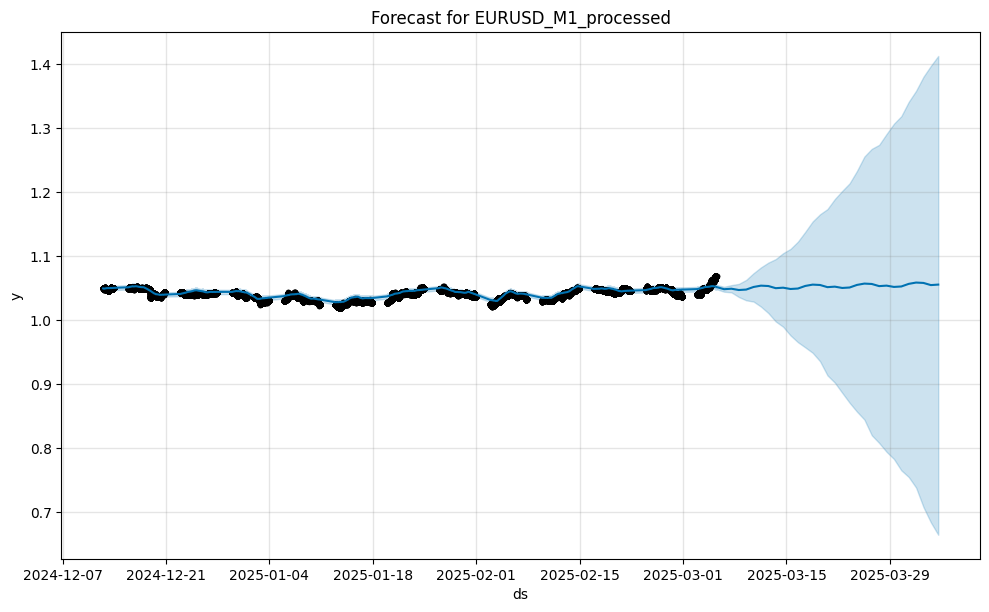


Checking GBPUSD_M1_processed for problematic values:
ATR14: inf=0, NaN=0, min=0.0003114285714285, max=0.0232371428571428
RSI14: inf=57, NaN=0, min=-467699.9999967696, max=512399.9999966925
BB_upper: inf=0, NaN=0, min=1.2224953154788136, max=1.3320535528697797
BB_lower: inf=0, NaN=0, min=1.1961267429979858, max=1.2972725291563172
Volume: inf=0, NaN=0, min=1, max=276
Price_Change: inf=0, NaN=0, min=-0.05495, max=0.0538800000000001


13:16:23 - cmdstanpy - INFO - Chain [1] start processing
13:18:29 - cmdstanpy - INFO - Chain [1] done processing


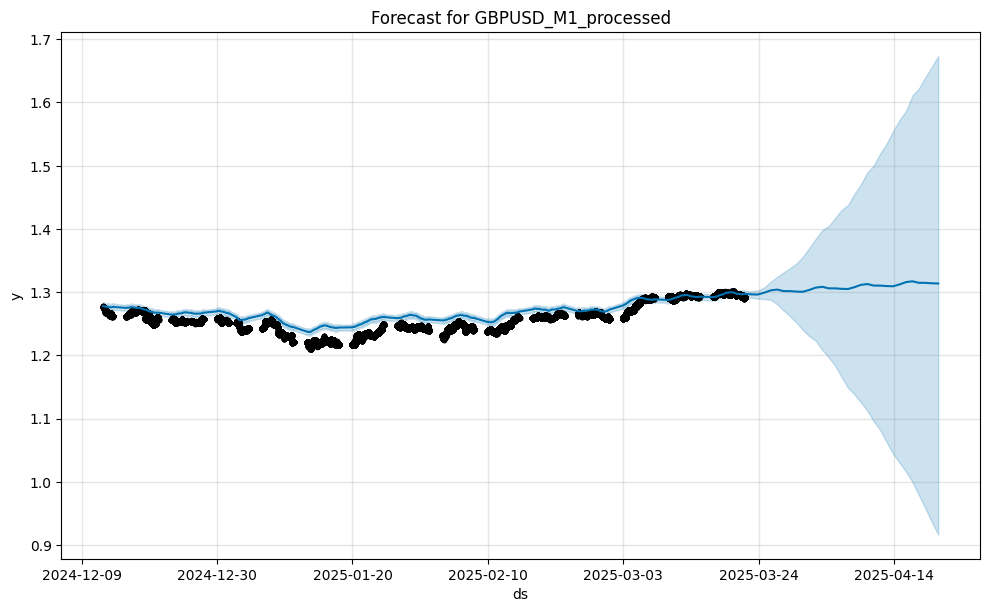


Checking USDCAD_M1_processed for problematic values:
ATR14: inf=0, NaN=0, min=0.0002435714285714, max=0.0119357142857142
RSI14: inf=46, NaN=0, min=-553300.0000084579, max=182199.9999988005
BB_upper: inf=0, NaN=0, min=1.4193235336997008, max=1.461261626679783
BB_lower: inf=0, NaN=0, min=1.4080267650347524, max=1.443115135802319
Volume: inf=0, NaN=0, min=1, max=324
Price_Change: inf=0, NaN=0, min=-0.0295499999999999, max=0.0274100000000001


13:18:52 - cmdstanpy - INFO - Chain [1] start processing
13:20:47 - cmdstanpy - INFO - Chain [1] done processing


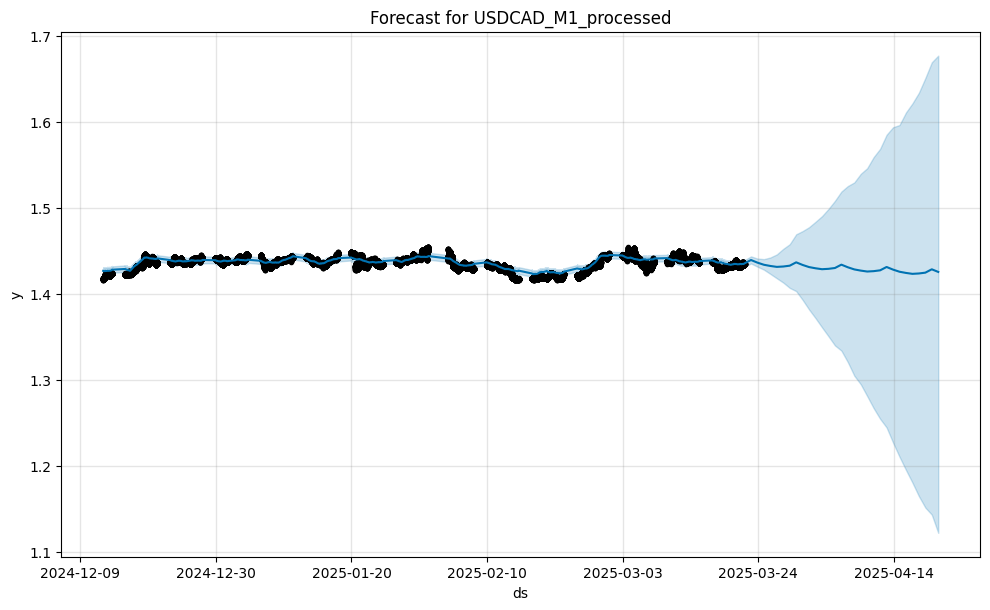


Checking USDCHF_M1_processed for problematic values:
ATR14: inf=0, NaN=0, min=0.0002028571428571, max=0.011205
RSI14: inf=68, NaN=0, min=-273500.0000011557, max=447100.0000018567
BB_upper: inf=0, NaN=0, min=0.8793034987412645, max=0.9283347179477046
BB_lower: inf=0, NaN=0, min=0.8645745963608357, max=0.9153348875076348
Volume: inf=0, NaN=0, min=1, max=212
Price_Change: inf=0, NaN=0, min=-0.0341, max=0.0325699999999999


13:21:09 - cmdstanpy - INFO - Chain [1] start processing
13:23:55 - cmdstanpy - INFO - Chain [1] done processing


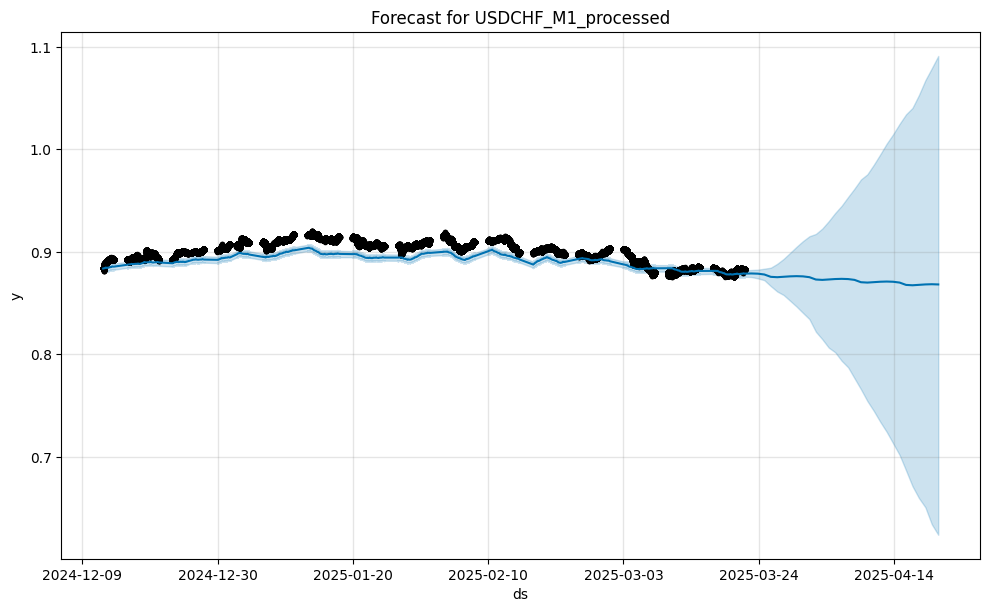

In [11]:
from sklearn.preprocessing import StandardScaler

for name, file in pd_dfs.items():
    if "Time" in file.columns:
        try:
            regressors = ["ATR14", "RSI14", "BB_upper", "BB_lower", "Volume", "Price_Change"]
            
            print(f"\nChecking {name} for problematic values:")
            for col in regressors:
                inf_count = np.isinf(file[col]).sum()
                nan_count = file[col].isna().sum()
                max_val = file[col].replace([np.inf, -np.inf], np.nan).max()
                min_val = file[col].replace([np.inf, -np.inf], np.nan).min()
                print(f"{col}: inf={inf_count}, NaN={nan_count}, min={min_val}, max={max_val}")

            clean_file = file.copy()

            for col in regressors:
                clean_file[col] = clean_file[col].replace([np.inf, -np.inf], np.nan)

            for col in regressors:
                median_val = clean_file[col].median()
                clean_file[col] = clean_file[col].fillna(median_val)

            scaler = StandardScaler()
            scaled_features = scaler.fit_transform(clean_file[regressors])
            scaled_features_df = pd.DataFrame(scaled_features, columns=regressors)

            model_df = pd.DataFrame({
                "ds": pd.to_datetime(clean_file["Time"]),
                "y": clean_file["Close"]
            })

            for col in regressors:
                model_df[col] = scaled_features_df[col].values

            model = Prophet(changepoint_prior_scale=0.01)
            
            for col in regressors:
                model.add_regressor(col, standardize=False)
                
            model.fit(model_df)

            future = model.make_future_dataframe(periods=30)
            
            for col in regressors:
                future[col] = model_df[col].iloc[-1]
            
            forecast = model.predict(future)
            
            fig = model.plot(forecast)
            plt.title(f"Forecast for {name}")
            plt.show()
            
        except Exception as e:
            print(f"Error processing {name}: {e}")